# Neural Networks Lab

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import dynworm as dw

## Exercise 1: Visualize brain connectomes

<img src="lab5_exercise1.png" width="1000">

In [2]:
# Load synaptic connectome and neuron classes

celegans_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
celegans_syn_conn_np = np.array(celegans_syn_conn_pd)

# Classes are ordered according to the neurons' order in synaptic connectome
neuron_classes = np.load('neuron_classes.npy') 

In [3]:
# Adjacency matrix of the first 10 neurons
print(celegans_syn_conn_np[:10, :10])

[[0 0 0 3 0 0 7 0 0 0]
 [0 0 1 0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [4]:
# Neuron classes of the first 10 neurons
print(neuron_classes[:10])

['sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory'
 'sensory' 'sensory' 'sensory']


In [5]:
def vis_conn(syn_conn, neuron_classes):    
    # Get all indicies of each sensory, motor, and inter neurons 
    sensory        = np.where(neuron_classes == 'sensory')[0]
    motor          = np.where(neuron_classes == 'motor')[0]
    inter          = np.where(neuron_classes == 'inter')[0]

    # Create 3 2D arrays using sensory, motor, and inter neuron indecies.
    sensory_matrix  = syn_conn[sensory, :][:, sensory] 
    motor_matrix    = syn_conn[motor, :][:, motor] 
    inter_matrix    = syn_conn[inter, :][:, inter] 
    
    plt.subplots(3, 1, figsize = (10, 30))
    
    plt.subplot(3, 1, 1)
    plt.pcolor(sensory_matrix, cmap = 'Greys', vmin = 0, vmax = 1)   
    plt.ylim(len(sensory_matrix), 0)                               # Invert y-axis so that the first row starts with vertex 0
    plt.xlabel('Sensory Target Vertices', fontsize = 20)                       # Set appropriate x-label
    plt.ylabel('Sensory Source Vertices', fontsize = 20)                       # Set appropriate y-label
    plt.xticks(fontsize = 20)                                          # Set x-ticks size
    plt.yticks(fontsize = 20)
    
    plt.subplot(3, 1, 2)
    plt.pcolor(motor_matrix, cmap = 'Greys', vmin = 0, vmax = 1)    
    plt.ylim(len(sensory_matrix), 0)                               # Invert y-axis so that the first row starts with vertex 0
    plt.xlabel('Motor Target Vertices', fontsize = 20)                       # Set appropriate x-label
    plt.ylabel('Motor Source Vertices', fontsize= 20)                       # Set appropriate y-label
    plt.xticks(fontsize = 20)                                          # Set x-ticks size
    plt.yticks(fontsize = 20)
    
    plt.subplot(3, 1, 3)
    plt.pcolor(inter_matrix, cmap = 'Greys', vmin = 0, vmax = 1)    
    plt.ylim(len(sensory_matrix), 0)                               # Invert y-axis so that the first row starts with vertex 0
    plt.xlabel('Inter Target Vertices', fontsize = 20)                       # Set appropriate x-label
    plt.ylabel('Inter Source Vertices', fontsize = 20)                       # Set appropriate y-label
    plt.xticks(fontsize = 20)                                          # Set x-ticks size
    plt.yticks(fontsize = 20)
    
    

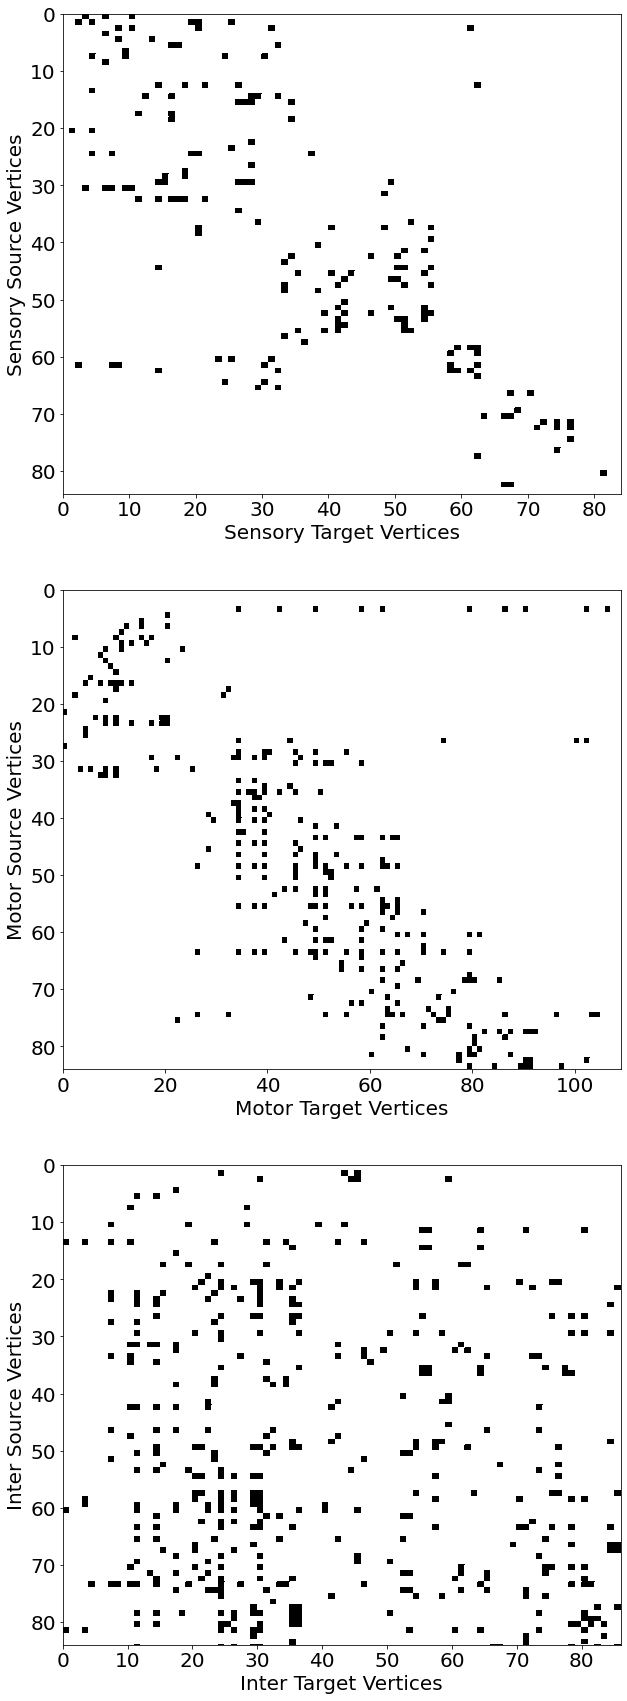

In [6]:
# Test your function here

vis_conn(syn_conn = celegans_syn_conn_np, neuron_classes = neuron_classes)

## Exercise 2: Locating the most connected vertices

<img src="lab5_exercise2.png" width="1000">

In [7]:
# Load the synaptic connectome and sample social network

syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
syn_conn_np = np.array(syn_conn_pd)

social_network_sample_pd = pd.read_excel('social_network_sample.xlsx')
social_network_sample_np = np.array(social_network_sample_pd)

In [8]:
def find_hub_vertices(adj_mat, num_vertices):
    
    # YOUR CODE HERE
    #create arrays of correct size for in_degrees and out_degrees
    in_degrees = np.zeros((len(adj_mat)))
    out_degrees = np.zeros((len(adj_mat)))
    for i in range(0, len(adj_mat)):
        in_degrees[i] = np.sum(adj_mat[:, i]) #adding the sum of the inputs in each column (in_degrees for each vertice)
        out_degrees[i] = np.sum(adj_mat[i, :]) #adding the sum of the inputs in each row (out_degrees for each vertice)
    #create array corresponding to the indices of in_degrees, with in_degrees2[0] = the largest value in in_degrees
    in_degrees2 = np.argsort(in_degrees)[::-1] 
    #create array corresponding to the indices of out_degrees, with out_degrees2[0] = the largest value in in_degrees
    out_degrees2 = np.argsort(out_degrees)[::-1]
    indegree_list = in_degrees2[:num_vertices] #create array of length (num_vertices) with the indices of highest in_degree 
    outdegree_list = out_degrees2[:num_vertices] #create array of length (num_vertices) with the indices of highest out_degree
    
    return indegree_list, outdegree_list

In [9]:
# Test your function with synaptic connectome

indegree_list_syn_conn, outdegree_list_syn_conn = find_hub_vertices(adj_mat = syn_conn_np, num_vertices = 10)

In [10]:
print(indegree_list_syn_conn)

[105 214 195 231  48  96 181 253  58 163]


In [11]:
print(outdegree_list_syn_conn)

[ 56  48 261  64 253 267  15   7 172 244]


In [12]:
# Test your function with sample social media network

indegree_list_SN, outdegree_list_SN = find_hub_vertices(adj_mat = social_network_sample_np, num_vertices = 5)

In [13]:
print(indegree_list_SN)

[31 62 43 93 53]


In [14]:
print(outdegree_list_SN)

[ 1 99 26 19 49]


## Exercise 3: Removing vertices from a graph

<img src="lab5_exercise3.png" width="1000">

In [15]:
# We will use the pre-existing directed graph sample earlier in the lab

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)
#print(directed_adj_mat_np)

In [16]:
def remove_vertices(adj_mat, vertices_2b_removed):
    
    adj_mat_new = np.copy(adj_mat) #set ajd_mat_new to have the same values as adj_mat
    
    for i in range(len(vertices_2b_removed)): #loop through the amount of vertices to be removed
        #remove both row and column associated with vertice to be removed 
        adj_mat_new =  np.delete(adj_mat_new, vertices_2b_removed[i], axis = 0) #removes row
        adj_mat_new =  np.delete(adj_mat_new, vertices_2b_removed[i], axis = 1) #removes column
        for j in range(i, len(vertices_2b_removed)):
            #make sure that remaining vertices are adjusted, size of adj_mat_new has changed from nxn to (n-1)x(n-1)
            vertices_2b_removed[j] = vertices_2b_removed[j] - 1 
            
    return adj_mat_new #return updated adj_mat

In [17]:
vertices_2b_removed_1 = [0, 5]        # Vertices to be removed set 1
vertices_2b_removed_2 = [1, 2, 6]     # Vertices to be removed set 2

In [18]:
# Test your function with set 1

directed_adj_mat_new_1 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_1)

In [19]:
# Test your function with set 2

directed_adj_mat_new_2 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_2)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

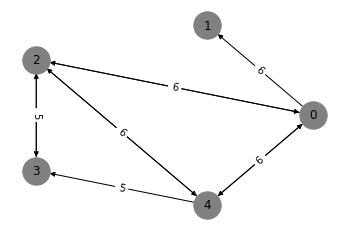

In [20]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_1
# Use circular graph layout
# Label your edges according to their weights

directed_adj_mat_nx = nx.from_numpy_array(directed_adj_mat_new_1, create_using=nx.DiGraph()) 

pos=nx.circular_layout(directed_adj_mat_nx) # Obtain positions of vertex according to circular graph layout

# Use nx.draw_networkx() to plot the graph
nx.draw_networkx(directed_adj_mat_nx, pos, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() to obtain the edge weights according to adjacency matrix
labels = nx.get_edge_attributes(directed_adj_mat_nx,'weight')

# Use nx.draw_networkx_edge_labels() to label the edges with the weights
nx.draw_networkx_edge_labels(directed_adj_mat_nx, pos,edge_labels=labels)

plt.axis('off')
plt.show()

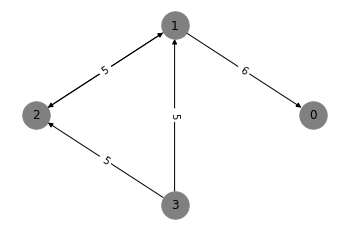

In [21]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_2
# Use circular graph layout
# Label your edges according to their weights

directed_adj_mat_nx = nx.from_numpy_array(directed_adj_mat_new_2, create_using=nx.DiGraph()) 

pos=nx.circular_layout(directed_adj_mat_nx) # Obtain positions of vertex according to circular graph layout

# Use nx.draw_networkx() to plot the graph
nx.draw_networkx(directed_adj_mat_nx, pos, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() to obtain the edge weights according to adjacency matrix
labels = nx.get_edge_attributes(directed_adj_mat_nx,'weight')

# Use nx.draw_networkx_edge_labels() to label the edges with the weights
nx.draw_networkx_edge_labels(directed_adj_mat_nx, pos,edge_labels=labels)

plt.axis('off')
plt.show()

## Exercise 4: Adding a new vertex to a graph

<img src="lab5_exercise4.png" width="1000">

In [22]:
# We will use the pre-existing directed graph sample earlier in the lab
# The graph has 7 vertices

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [23]:
def add_vertex(adj_mat, outgoing_edges, incoming_edges):
    # The original directed graph has 7 vertices
    # The new vertex to be added can be regarded as 8th vertex of the graph
    # You can assume that each edge being added has weight of 1
    
    a = np.array([0, 0, 0, 0, 0, 0, 0]) #create array to stack on bottom of adj_mat
    b = np.array([[0], [0], [0], [0], [0], [0], [0], [0]]) #create array to stack on the right side of adj_mat
    
    #create adj_mat_new, same values as adj_mat, except additional row and column filled with zeros 
    #(adding vertice with no connections)
    adj_mat_new = np.vstack((adj_mat, a))
    adj_mat_new = np.hstack((adj_mat_new, b))

    for i in range(len(outgoing_edges)):
        #creating edges with weight 1 going from new vertice to other vertices according to outgoing_edges
        adj_mat_new[outgoing_edges, 7] = 1 
        #creating edges with weight 1 coming from other vertices according to incoming_edges to new vertice
        adj_mat_new[7, incoming_edges] = 1
    
    return adj_mat_new #return updated adj_mat

In [24]:
# Define outgoing and incoming edges for the new vertex to be added

outgoing_edges = [2, 3, 5]
incoming_edges = [3, 4, 6]

In [25]:
# Test your function with provided list of outgoing/incoming edges

directed_adj_mat_vertex_added = add_vertex(adj_mat = directed_adj_mat_np, 
                                  outgoing_edges = outgoing_edges, 
                                  incoming_edges = incoming_edges)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

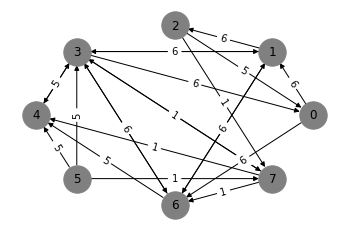

In [26]:
# Using networkX, plot your directed graph with added vertices according to outgoing_edges and incoming_edges
# Use circular graph layout
# Label your edges according to their weights
# YOUR CODE HERE
directed_adj_mat_nx = nx.from_numpy_array(directed_adj_mat_vertex_added, create_using=nx.DiGraph()) 

pos=nx.circular_layout(directed_adj_mat_nx) # Obtain positions of vertex according to circular graph layout

# Use nx.draw_networkx() to plot the graph
nx.draw_networkx(directed_adj_mat_nx, pos, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() to obtain the edge weights according to adjacency matrix
labels = nx.get_edge_attributes(directed_adj_mat_nx,'weight')

# Use nx.draw_networkx_edge_labels() to label the edges with the weights
nx.draw_networkx_edge_labels(directed_adj_mat_nx, pos,edge_labels=labels)

plt.axis('off')
plt.show()

## Exercise 5: Re-wire neurons to restore behavior of C. elegans

<img src="lab5_exercise5.png" width="1000">

### Note: If you wish to use the included C. elegans simulation code in lab template folder outside of EE 241 (e.g. research purpose), please cite the following paper 
### Kim, J., Leahy, W., & Shlizerman, E. (2019). Neural interactome: Interactive simulation of a neuronal system. Frontiers in Computational Neuroscience, 13, 8. 

In [27]:
# Load synaptic connectome and neuron classes

damaged_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
damaged_syn_conn_np = np.array(damaged_syn_conn_pd)

## Motorneurons' activities during gentle tail touch (Damaged brain)

<img src="damaged_AVA_motor_activities.png" width="450">

## Simulated body movement during gentle tail touch (Damaged brain)

In [28]:
from ipywidgets import Video

Video.from_file("escape_response_damaged.mp4", width=500, height=500)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x06\x01umdat\x00\x…

In [29]:
# Re-wiring instructions for AVAL and AVAR neurons

outgoing_AVAL_triples = np.load('AVAL_outgoing_triples.npy') # AVAL is the 47th vertex in the graph
incoming_AVAL_triples = np.load('AVAL_incoming_triples.npy') # AVAL is the 47th vertex in the graph

outgoing_AVAR_triples = np.load('AVAR_outgoing_triples.npy') # AVAR is the 55th vertex in the graph
incoming_AVAR_triples = np.load('AVAR_incoming_triples.npy') # AVAR is the 55th vertex in the graph

# Each row in the triple is ordered as [Source neuron index, Target neuron index, Synaptic weight]

rewiring_triples_AVAL = [outgoing_AVAL_triples, incoming_AVAL_triples]
rewiring_triples_AVAR = [outgoing_AVAR_triples, incoming_AVAR_triples]

In [30]:
def rewire_neurons(damaged_synaptic_adj_matrix, rewiring_instructions_AVAL, rewiring_instructions_AVAR):
    # AVAL, AVAR neurons take the indices of 47, 55 respectively in the damaged_syn_conn_np   
    
    repaired_synaptic_adj_matrix = np.copy(damaged_syn_conn_np) #set ajd_mat_new to have the same values as adj_mat
    for i in (rewiring_instructions_AVAL[0]):
        #for each triple array in rewiring_instructions_AVAL for outgoing connections,
        #set appropriate weighted edge between appropriate vertices
        repaired_synaptic_adj_matrix[47, i[1]] = i[2] 
    for i in (rewiring_instructions_AVAL[1]):
        #for each triple array in rewiring_instructions_AVAL for incoming connections,
        #set appropriate weighted edge between appropriate vertices
        repaired_synaptic_adj_matrix[i[0], 47] = i[2]
    for i in (rewiring_instructions_AVAR[0]):
        #for each triple array in rewiring_instructions_AVAR for outgoing connections,
        #set appropriate weighted edge between appropriate vertices
        repaired_synaptic_adj_matrix[55, i[1]] = i[2]
    for i in (rewiring_instructions_AVAR[1]):
        #for each triple array in rewiring_instructions_AVAR for incoming connections,
        #set appropriate weighted edge between appropriate vertices
        repaired_synaptic_adj_matrix[i[0], 55] = i[2]
    
    return repaired_synaptic_adj_matrix #return fixed adj_mat

In [31]:
repaired_synaptic_adj_matrix = rewire_neurons(damaged_synaptic_adj_matrix = damaged_syn_conn_np, 
                                              rewiring_instructions_AVAL = rewiring_triples_AVAL, 
                                              rewiring_instructions_AVAR = rewiring_triples_AVAR)

Repair operation successful! - Simulating the nervous system and body for gentle tale touch
All neurons are healthy
Network integration prep completed...
Computing network dynamics...


C:\Users\alham\Desktop\241Labs\Neural Networks\dynworm\network_sim.py:278: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth'])))))
C:\Users\alham\Desktop\241Labs\Neural Networks\dynworm\network_sim.py:308: RuntimeWarning: overflow encountered in exp
  sigmoid_V = np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth']))))


11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.5% completed
66.6% completed
77.7% completed
88.9% completed
100.0% completed


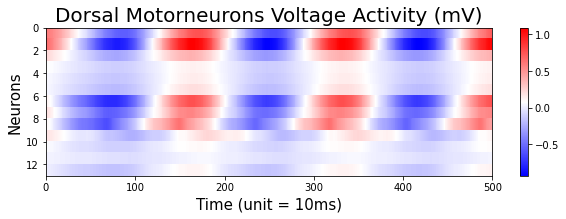

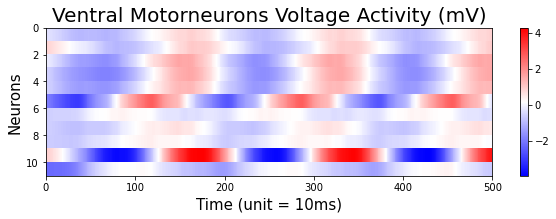

In [32]:
# Test your repaired connectome 

dw.network_sim.test_brain_repair(repaired_synaptic_adj_matrix) 

# If successfully repaired, function will output 
# 1) Motorneurons activity 
# 2) Simulated body movement video with repaired brain